In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, Input, RandomContrast
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

Tensor Flow bhanney python ko library use garirachhu ani CNN cahi euta type ko deep learning mdel ho which will be used in this project for image processing . (Convolutional Neural Network). tensor le chai built in tools haru provide garchha CNN models train garna. 

In [2]:
tf.__version__

'2.18.0'

In [3]:
#Image count

In [4]:
import os

count = 0
dirs = os.listdir('Images/')

for dir in dirs:
    dir_path = os.path.join('Images', dir)
    if os.path.isdir(dir_path):  # Check if it's a directory
        files = list(os.listdir(dir_path))
        print(dir + ' Folder has ' + str(len(files)) + ' Images')
        count += len(files)

print('Images Folder has ' + str(count) + ' Images')


daisy Folder has 1742 Images
iris Folder has 1041 Images
rose Folder has 1780 Images
dandelion Folder has 2278 Images
sunflower Folder has 1783 Images
Images Folder has 8624 Images


In [5]:
#Load Images into Arrays as Dataset

In [6]:
base_dir = 'Images/'
img_size = 180
batch = 32

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 8463 files belonging to 5 classes.
Using 6771 files for training.
Found 8463 files belonging to 5 classes.
Using 1692 files for validation.


In [8]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'iris', 'rose', 'sunflower']

In [9]:
import matplotlib.pyplot as plt

2025-03-14 07:29:21.376268: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


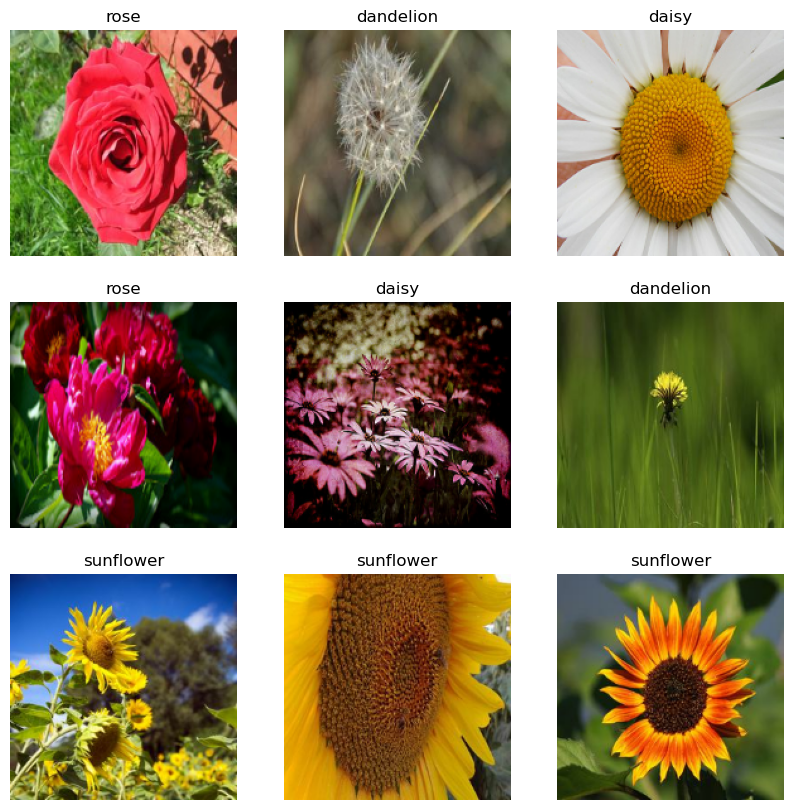

In [10]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [11]:
AUTOTUNE = tf.data.AUTOTUNE #adjusts data loading speed to make training faster

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [13]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [14]:
#Data Augmentation  to artificially increase the size of a dataset by applying transformations 

In [15]:
data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),  # Explicit Input layer
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomContrast(0.1)
])

2025-03-14 07:29:28.496882: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


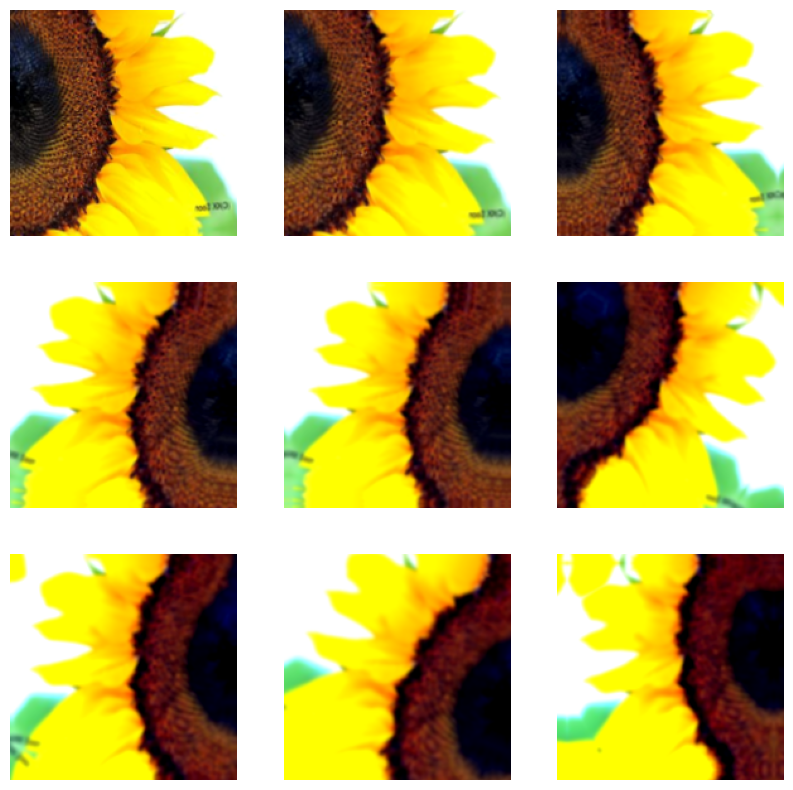

In [16]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [17]:
#Model Creation

In [18]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5) #number of set of flowers
])

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(train_ds, epochs=15, validation_data = val_ds)
#train_ds → Your training dataset, containing images and labels.
# epochs=25 → You are training the model for 25 complete passes through the dataset.
# validation_data=val_ds → You are using val_ds (validation dataset) to evaluate the model after each epoch.
# history → Stores training results (like loss & accuracy) for later analysis.

Epoch 1/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 46s 212ms/step - accuracy: 0.5159 - loss: 1.2016 - val_accuracy: 0.7423 - val_loss: 0.7307
Epoch 2/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 54s 253ms/step - accuracy: 0.7787 - loss: 0.6402 - val_accuracy: 0.7961 - val_loss: 0.5629
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 52s 244ms/step - accuracy: 0.8069 - loss: 0.5347 - val_accuracy: 0.8215 - val_loss: 0.5262
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 51s 239ms/step - accuracy: 0.8291 - loss: 0.4881 - val_accuracy: 0.8115 - val_loss: 0.5200
Epoch 5/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 51s 238ms/step - accuracy: 0.8474 - loss: 0.4436 - val_accuracy: 0.8298 - val_loss: 0.4947
Epoch 6/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 48s 228ms/step - accuracy: 0.8630 - loss: 0.4013 - val_accuracy: 0.8505 - val_loss: 0.4383
Epoch 7/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 47s 220ms/step - accuracy: 0.8628 - loss: 0.3862 - val_accuracy: 0.8558 - val_loss: 0.4145
Epoch 8/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 50s 236ms/step - accuracy: 0.8744 - loss: 0

In [22]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path,target_size = (180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome


In [50]:
classify_images('Samples/iris_9.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


'The image belongs to iris with a score of 99.9725878238678'

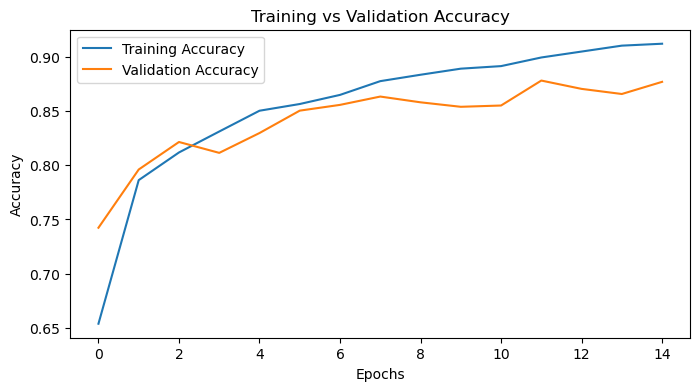

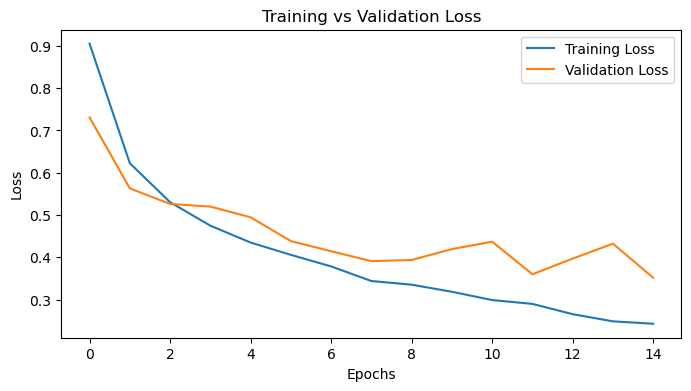

In [23]:
import matplotlib.pyplot as plt

# Get accuracy and loss history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(8, 4))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

# Plot Loss
plt.figure(figsize=(8, 4))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [24]:
model.save('Flower_recognition.h5')